In [7]:
import pandas as pd

DATASET_PATH = '../dataset'

all_postings = pd.read_csv(f'{DATASET_PATH}/postings.csv')
all_postings.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [30]:
import pandas as pd
import re

# Define a list of programming languages, removing "Go" and ensuring accurate matches
programming_languages = [
    "Python", "Java", "JavaScript", "C\\+\\+", "C#", "Ruby", "Swift", "Kotlin",
    "Rust", "PHP", "TypeScript", "Scala", "Perl", "Haskell", "Lua",
    "Dart", "Objective-C", "MATLAB",
]

# Define additional tech-related keywords
tech_keywords = [
    "data science", "data analytics", 'machine learning', 'deep learning', 'artificial intelligence', "frontend", 'backend', 'git', 'api', 'apis', 'json', 'sdk', 'developer'
]

# Combine programming languages and tech-related keywords
combined_keywords = programming_languages + tech_keywords

# Convert the combined list into a regex pattern ensuring whole-word matches
pattern = r"\b(?:{})\b".format("|".join(combined_keywords))

# Count matches in title and description
all_postings["match_count"] = all_postings["title"].str.count(pattern, flags=re.IGNORECASE).fillna(0) + \
                    all_postings["description"].str.count(pattern, flags=re.IGNORECASE).fillna(0)

# Filter jobs that match at least 2 of the combined keywords
tech_postings = all_postings[all_postings["match_count"] >= 3].drop(columns=["match_count"])

tech_postings.head(20)


,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
26,175485704,GOYT,Software Engineer,Job Description:GOYT is seeking a skilled and ...,NaN,NaN,"Denver, CO",76987056.0,273.0,NaN,...,NaN,1.713281e+12,NaN,0,PART_TIME,NaN,NaN,NaN,80202.0,8031.0
78,2234533717,Ideando Inc,Full Stack Engineer,"Location: Remote\nCompany Overview:SkillFit, a...",NaN,NaN,United States,69611476.0,21.0,NaN,...,NaN,1.713493e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
129,3366698309,Webologix Ltd/ INC,Anaplan Developer,Job Title: Anaplan Developer\n\nLocations: US ...,NaN,NaN,United States,14524845.0,2.0,NaN,...,NaN,1.713471e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
146,3475933396,USLI,Senior Developer,This individual will work with a high performa...,NaN,NaN,Greater Philadelphia,33421.0,NaN,NaN,...,NaN,1.713538e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
163,3533320307,NLB Services,Java architect / Lead Java developer,Position: Java architect / Lead Java developer...,NaN,NaN,"Jersey City, NJ",490432.0,3.0,NaN,...,NaN,1.712855e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,7302.0,34017.0
181,3586167732,StyleAI,Senior Software Engineer,"StyleAI is the AI-powered, all-in-one unified ...",NaN,NaN,San Francisco Bay Area,90662302.0,31.0,NaN,...,NaN,1.713397e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
196,3625991523,Xoriant,DDI Engineer,Title: Infoblox/DNS EngineerLocation: 6860 Yos...,NaN,NaN,"Jersey City, NJ",166996.0,24.0,NaN,...,NaN,1.713277e+12,NaN,0,CONTRACT,NaN,NaN,NaN,7302.0,34017.0
260,3722423668,Wanderboat AI,Founding Front-End Engineer (Web),The ideal candidate will be responsible for de...,NaN,NaN,San Francisco Bay Area,99336130.0,15.0,NaN,...,NaN,1.713496e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
266,3728459637,HireBus,Principal Backend Engineer,Principal Backend Engineer - Join HireBus and ...,225.0,YEARLY,United States,91326370.0,7.0,NaN,...,NaN,1.713471e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,212.5,NaN,NaN
283,3742692445,ZenithMinds Inc,Sr Data Engineer with Kafka,Data Engineer with Kafka (W2 Only)💯% Remote\nM...,NaN,NaN,"Austin, TX",81941852.0,39.0,NaN,...,NaN,1.713209e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,78701.0,48453.0


In [31]:
print(tech_postings.shape)

(5933, 31)


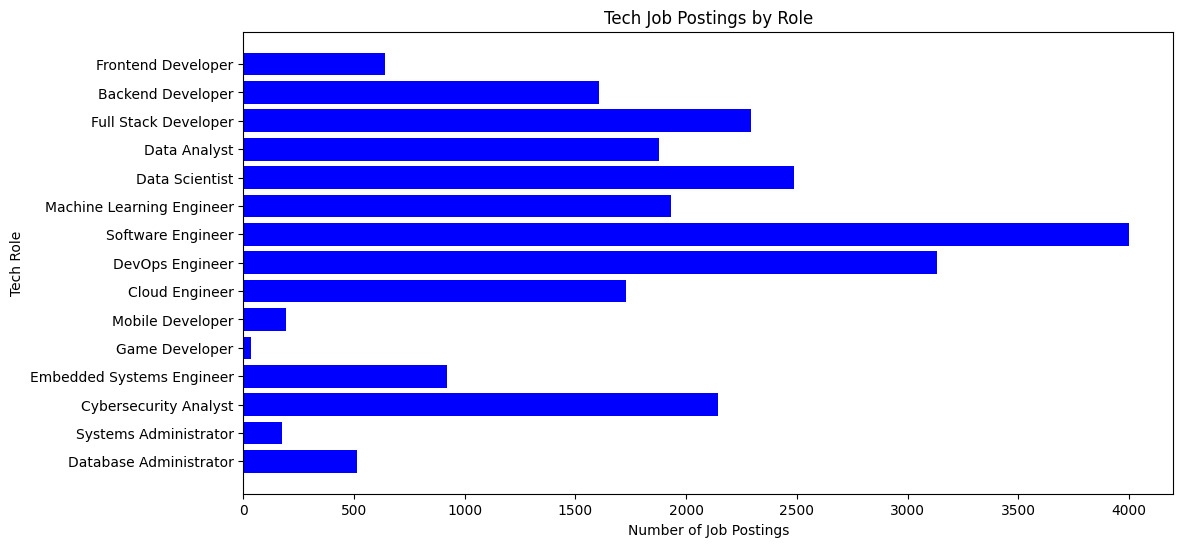

In [37]:
import matplotlib.pyplot as plt

# Re-defining the role filters since the previous execution context was lost
ROLE_FILTERS = {
    "Frontend Developer": [
        "frontend", "UI", "user interface", "React", "Vue", "Angular", "CSS", "HTML", "JavaScript", 
        "TypeScript", "Svelte", "Next.js", "Bootstrap", "Tailwind", "GraphQL"
    ],
    "Backend Developer": [
        "backend", "server-side", "API", "Django", "Flask", "Spring Boot", "Node.js", "SQL", "database", 
        "Redis", "PostgreSQL", "MySQL", "MongoDB", "GraphQL", "PHP", "Ruby on Rails", "FastAPI"
    ],
    "Full Stack Developer": [
        "full stack", "frontend and backend", "React", "Node.js", "Django", "Angular", "MongoDB", "Express.js", 
        "Next.js", "GraphQL", "NestJS"
    ],
    "Data Analyst": [
        "data analyst", "data analytics", "SQL", "Excel", "business intelligence", "BI", "Tableau", "Power BI", 
        "Google Analytics", "Looker", "Pandas", "NumPy", "Statistics", "ETL", "Data Warehouse"
    ],
    "Data Scientist": [
        "data scientist", "machine learning", "deep learning", "AI", "NLP", "TensorFlow", "PyTorch", "Python", 
        "R", "Scikit-learn", "Pandas", "NumPy", "Keras", "Hugging Face", "Statistics", "Big Data", "Data Mining"
    ],
    "Machine Learning Engineer": [
        "machine learning engineer", "ML", "AI models", "TensorFlow", "PyTorch", "Hugging Face", "Python", "R", 
        "Deep Learning", "LLM", "Natural Language Processing", "Computer Vision", "OpenAI"
    ],
    "Software Engineer": [
        "software engineer", "software developer", "programmer", "coding", "C++", "Java", "Python", "C#", "TypeScript",
        "Scala", "Rust", "Golang", "Kotlin", "Dart", "GraphQL", "Agile", "Scrum", "Microservices", "TDD"
    ],
    "DevOps Engineer": [
        "DevOps", "CI/CD", "Kubernetes", "Docker", "AWS", "Azure", "Jenkins", "Terraform", "Bash", "Python", 
        "Linux", "Ansible", "Puppet", "Helm", "GitOps"
    ],
    "Cloud Engineer": [
        "cloud engineer", "AWS", "Azure", "Google Cloud", "cloud computing", "Terraform", "Kubernetes", "Serverless", 
        "Lambda", "BigQuery", "IAM", "CloudFormation"
    ],
    "Mobile Developer": [
        "mobile developer", "iOS developer", "Android developer", "Swift", "Kotlin", "React Native", "Flutter", 
        "Dart", "Xamarin", "Jetpack Compose"
    ],
    "Game Developer": [
        "game developer", "Unity", "Unreal Engine", "game engine", "C++", "C#", "game programming", "Godot", 
        "HLSL", "OpenGL", "DirectX", "Shader"
    ],
    "Embedded Systems Engineer": [
        "embedded systems", "firmware", "IoT", "microcontroller", "real-time systems", "C", "C++", "FPGA", "VHDL", 
        "Verilog", "Arduino", "Raspberry Pi"
    ],
    "Cybersecurity Analyst": [
        "cybersecurity", "penetration testing", "security analyst", "ethical hacking", "SOC", "Python", "C", 
        "Bash", "Metasploit", "Kali Linux", "SIEM", "Network Security", "Threat Hunting"
    ],
    "Systems Administrator": [
        "systems administrator", "IT support", "Linux admin", "Windows server", "network security", "Bash", 
        "PowerShell", "Active Directory", "VMware", "Hyper-V", "SysAdmin"
    ],
    "Database Administrator": [
        "database administrator", "DBA", "SQL Server", "MySQL", "PostgreSQL", "MongoDB", "NoSQL", "Oracle DB", 
        "Redis", "Data Migration"
    ],
}

# Function to count matches for a job against a list of keywords
def count_matches(job_title, job_desc, keywords):
    """Returns the count of matches of the given keywords in job title and description."""
    pattern = r"\b(?:{})\b".format("|".join(map(re.escape, keywords)))  # Ensure exact word matching
    return (
        len(re.findall(pattern, job_title, re.IGNORECASE)) +
        len(re.findall(pattern, job_desc, re.IGNORECASE))
    )

# Initialize role counts
role_counts = {role: 0 for role in ROLE_FILTERS}

# Process job postings
for _, row in tech_postings.iterrows():
    job_title = str(row["title"])
    job_desc = str(row["description"])
    
    matched_roles = []
    
    for role, keywords in ROLE_FILTERS.items():
        if count_matches(job_title, job_desc, keywords) >= 2:  # Match if count is 2 or more
            matched_roles.append(role)
    
    # Full Stack differentiation: If both Frontend & Backend are matched, prefer Full Stack
    if "Frontend Developer" in matched_roles and "Backend Developer" in matched_roles:
        matched_roles = [r for r in matched_roles if r not in ["Frontend Developer", "Backend Developer"]]
        matched_roles.append("Full Stack Developer")

    # Increment role counts
    for role in matched_roles:
        role_counts[role] += 1

# Convert results to a DataFrame
role_counts_df = pd.DataFrame(list(role_counts.items()), columns=["Role", "Job Count"])

# Visualize results
plt.figure(figsize=(12, 6))
plt.barh(role_counts_df["Role"], role_counts_df["Job Count"], color="blue")
plt.xlabel("Number of Job Postings")
plt.ylabel("Tech Role")
plt.title("Tech Job Postings by Role")
plt.gca().invert_yaxis()  # Invert y-axis to show highest count on top
plt.show()
